## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/DELL/Desktop/ml_project/train.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


### Dropping duplicate rows

In [3]:
a=len(df)
print('Original dataframe length',a)
df.drop_duplicates(inplace=True)
b=len(df)
print('Dataframe length after dropping duplicate rows',b)
print('No of duplicate rows removed',a-b)

Original dataframe length 45211
Dataframe length after dropping duplicate rows 45205
No of duplicate rows removed 6


### Checking for missing values in each columns

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

- No missing values,so no need for missing data imputation

### No of Labels in each feature column

In [5]:
print("CATEGORICAL VARIABLES",'\n')
for column_name in ['job','marital','education_qual','call_type','mon','prev_outcome']:
    print('No. of labels in',f"{column_name:{58}}",df[column_name].nunique())
    print(df[column_name].unique(),'\n')

print('NUMERICAL VARIABLES','\n')
for column_name in ['age','day','dur','num_calls']:
    print('No. of labels in',f"{column_name:{20}}",df[column_name].nunique(),'\n')    

CATEGORICAL VARIABLES 

No. of labels in job                                                        12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

No. of labels in marital                                                    3
['married' 'single' 'divorced'] 

No. of labels in education_qual                                             4
['tertiary' 'secondary' 'unknown' 'primary'] 

No. of labels in call_type                                                  3
['unknown' 'cellular' 'telephone'] 

No. of labels in mon                                                        12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

No. of labels in prev_outcome                                               4
['unknown' 'failure' 'other' 'success'] 

NUMERICAL VARIABLES 

No. of labels in age                  77 

No. of labels in day                  31 

No. of lab

In [6]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [8]:
#selecting only numeric columns
df.select_dtypes(include=np.number).head()

,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
3,47,5,92,1
4,33,5,198,1


### Outlier engineering for numerical variables

In [9]:
def plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

   # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

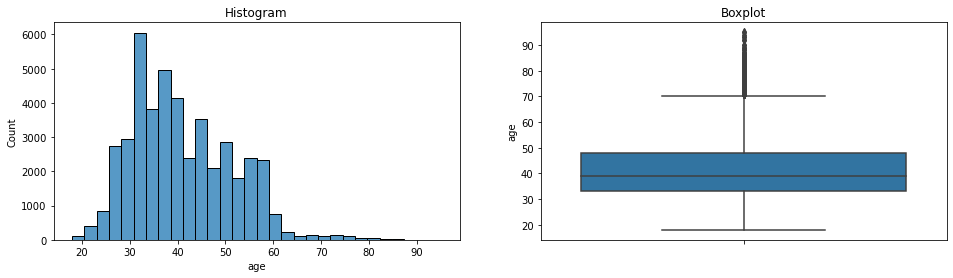

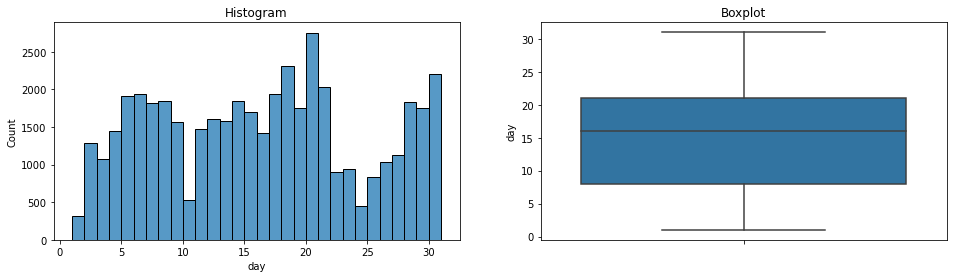

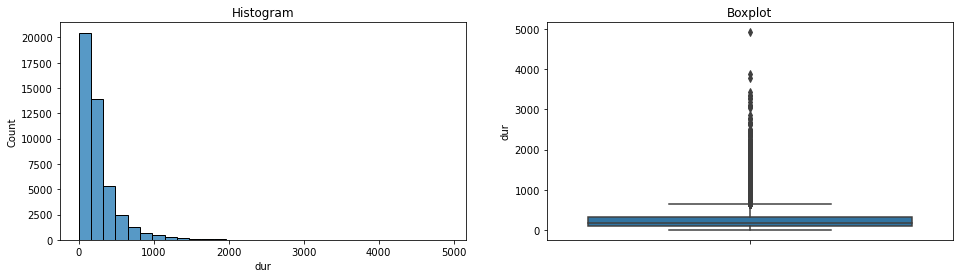

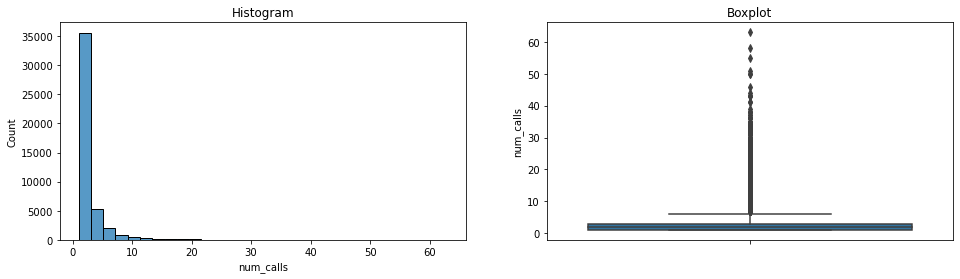

In [10]:
plots(df, 'age')
plots(df, 'day')
plots(df, 'dur')
plots(df, 'num_calls')

*We can see that there are more outliers on the right tail of the variables 'age','dur' and 'num_calls'.* 
- **No outlier is observed in the variable 'day'**

In [11]:
def find_skewed_boundaries(df, variable, distance):

    # Calculating the boundaries outside which sit the outliers
    # for skewed distributions


    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [12]:
age_upper_limit, age_lower_limit = find_skewed_boundaries(df, 'age', 1.5)
age_upper_limit, age_lower_limit

(70.5, 10.5)

In [13]:
dur_upper_limit, dur_lower_limit = find_skewed_boundaries(df, 'dur', 1.5)
dur_upper_limit, dur_lower_limit

(643.0, -221.0)

In [14]:
num_calls_upper_limit, num_calls_lower_limit = find_skewed_boundaries(df, 'num_calls', 1.5)
num_calls_upper_limit, num_calls_lower_limit

(6.0, -2.0)

### Function to replace the outliers by the maximum and minimum limit

In [15]:
def replace_outlier(dataset,variable,upper_limit,lower_limit):
    dataset[variable]= np.where(dataset[variable] > upper_limit, upper_limit,
                       np.where(dataset[variable] < lower_limit, lower_limit, dataset[variable]))

In [16]:
replace_outlier(df,'age',age_upper_limit, age_lower_limit)
replace_outlier(df,'dur',dur_upper_limit, dur_lower_limit)
replace_outlier(df,'num_calls',num_calls_upper_limit, num_calls_lower_limit)



### Checking for outliers after replacing the outliers with upper and lower limit values

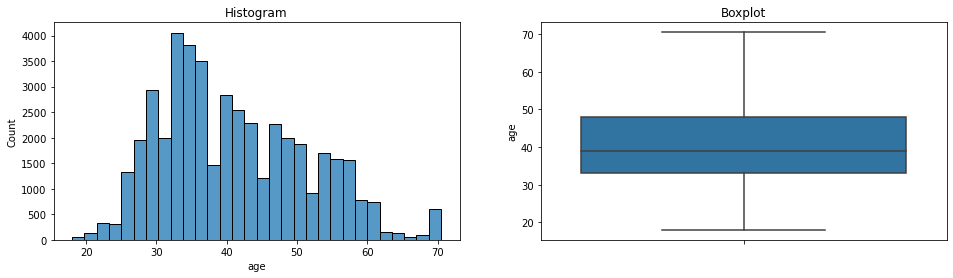

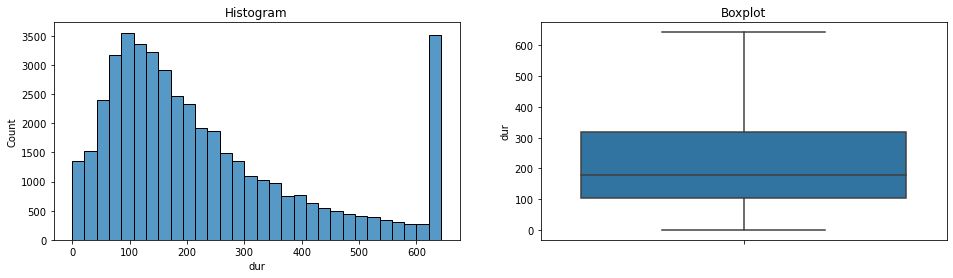

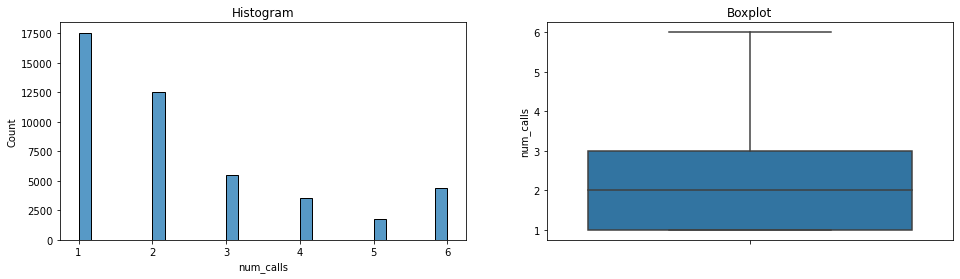

In [17]:
plots(df, 'age')
plots(df, 'dur')
plots(df, 'num_calls')

- All Outliers has gone,but the distributions are quite changed

In [18]:
df['y']=df['y'].map({'yes':1,'no':0})


In [19]:
#Creating a new target column by copying 'y' feature in the dataset
df = df.assign(target = df.y )

### Exploratory Data Analysis 

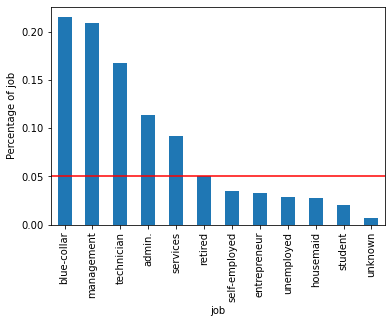

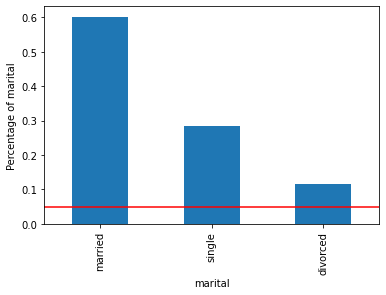

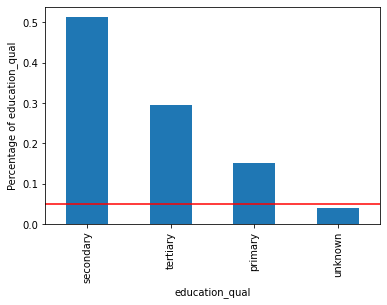

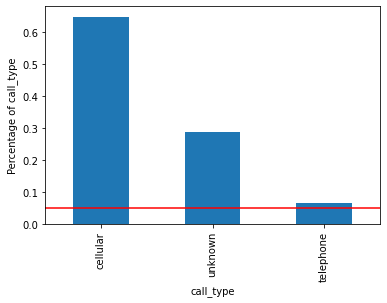

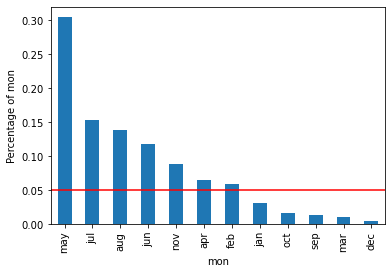

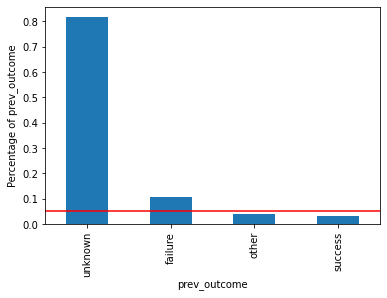

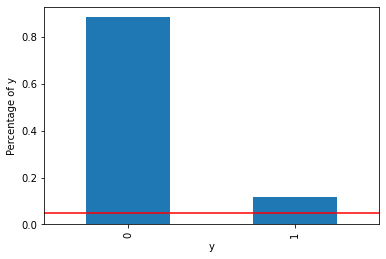

In [20]:
total= len(df)
# For each categorical variable
for col in ['job','marital','education_qual','call_type','mon','prev_outcome','y']:

    # Calculate the value_counts per category
    # and divide by total observations in the dataset to fnd the percent of that
    # particular label.

    temp_df = pd.Series(df[col].value_counts() / total)
    # Making plot with these percentages.
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Adding a line at 5 % to flag the threshold for rare categories.
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel(f'Percentage of {col}')
    plt.show()

*The dependant variable('y') has imbalanced binary classes*

### Finding the relationship of each label in a category with the target variable

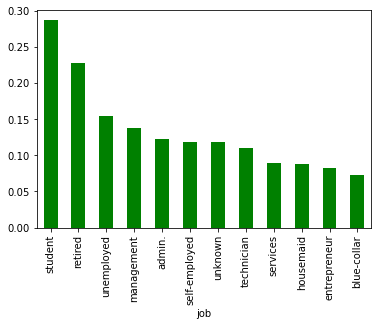

job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137570
admin.           0.122050
self-employed    0.118429
unknown          0.118056
technician       0.110585
services         0.088851
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.072765
Name: y, dtype: float64 

*************************************************


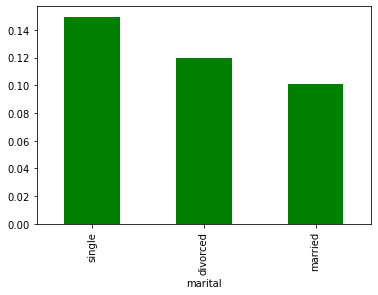

marital
single      0.149515
divorced    0.119455
married     0.101250
Name: y, dtype: float64 

*************************************************


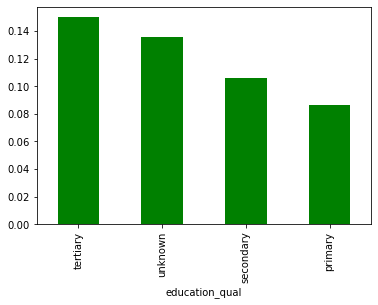

education_qual
tertiary     0.150086
unknown      0.135703
secondary    0.105608
primary      0.086277
Name: y, dtype: float64 

*************************************************


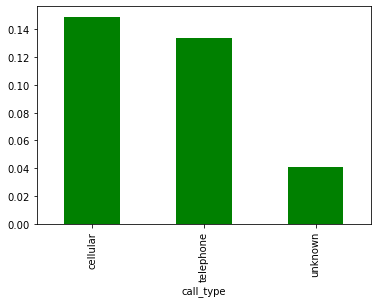

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: y, dtype: float64 

*************************************************


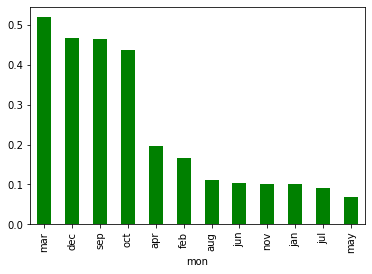

mon
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110168
jun    0.102266
nov    0.101511
jan    0.101212
jul    0.090949
may    0.067199
Name: y, dtype: float64 

*************************************************


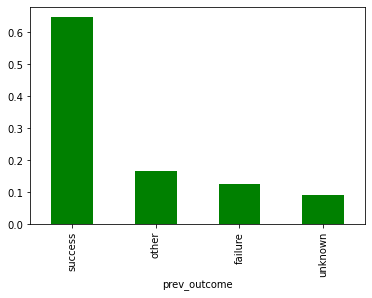

prev_outcome
success    0.647253
other      0.166848
failure    0.126097
unknown    0.091630
Name: y, dtype: float64 

*************************************************


In [21]:
#a=df.groupby(['mon']).mean()
total= len(df)

# For each categorical variable
for col1 in ['job','marital','education_qual','call_type','mon','prev_outcome']:
    temp_df1 =df.groupby([col1]).mean()
    temp_df1['y'].sort_values(ascending=False).plot.bar(color='green')
    plt.show()
    print(temp_df1['y'].sort_values(ascending=False),'\n')
    print('*************************************************')
    

### Ordinal label encoding

In [22]:
# For each categorical variable
for col2 in ['job','marital','education_qual','call_type','mon','prev_outcome']:
    temp_df2 =df.groupby([col2]).mean()
    b=temp_df2['y'].sort_values()
    print(b,'\n')
    
    
    labeling_dict = {
        label: i
        for i,label in enumerate(b.index)
    }
    # Mapping the dataframe using the labeling dict
    df[col2]=df[col2].map(labeling_dict)
    
    print('ordinal label encoding dict','\n',labeling_dict,'\n')
    print('---------------------------------------------------------')

job
blue-collar      0.072765
entrepreneur     0.082717
housemaid        0.087903
services         0.088851
technician       0.110585
unknown          0.118056
self-employed    0.118429
admin.           0.122050
management       0.137570
unemployed       0.155027
retired          0.227915
student          0.286780
Name: y, dtype: float64 

ordinal label encoding dict 
 {'blue-collar': 0, 'entrepreneur': 1, 'housemaid': 2, 'services': 3, 'technician': 4, 'unknown': 5, 'self-employed': 6, 'admin.': 7, 'management': 8, 'unemployed': 9, 'retired': 10, 'student': 11} 

---------------------------------------------------------
marital
married     0.101250
divorced    0.119455
single      0.149515
Name: y, dtype: float64 

ordinal label encoding dict 
 {'married': 0, 'divorced': 1, 'single': 2} 

---------------------------------------------------------
education_qual
primary      0.086277
secondary    0.105608
unknown      0.135703
tertiary     0.150086
Name: y, dtype: float64 

ordinal labe

In [23]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,0,3,0,5,0,261.0,1.0,0,0,0
1,44.0,4,2,1,0,5,0,151.0,1.0,0,0,0
2,33.0,1,0,1,0,5,0,76.0,1.0,0,0,0
3,47.0,0,0,2,0,5,0,92.0,1.0,0,0,0
4,33.0,5,2,2,0,5,0,198.0,1.0,0,0,0


In [24]:
df['job'].value_counts()

0     9730
8     9457
4     7596
7     5170
3     4153
10    2264
6     1579
1     1487
9     1303
2     1240
11     938
5      288
Name: job, dtype: int64

In [25]:
df1=pd.DataFrame({'age':df['age'],'job':df['job'],'marital':df['marital'],
    'education_qual':df['education_qual'],'call_type':df['call_type'],
    'day':df['day'],'mon':df['mon'],'dur':df['dur'],
    'num_calls':df['num_calls'],'prev_outcome':df['prev_outcome'],'y':df['y']})
df1.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,0,3,0,5,0,261.0,1.0,0,0
1,44.0,4,2,1,0,5,0,151.0,1.0,0,0
2,33.0,1,0,1,0,5,0,76.0,1.0,0,0
3,47.0,0,0,2,0,5,0,92.0,1.0,0,0
4,33.0,5,2,2,0,5,0,198.0,1.0,0,0


In [26]:
# plots(df1, 'age')
# plots(df1, 'day')
# plots(df1, 'dur')
# plots(df1, 'num_calls')
# plots(df1, 'job')
# plots(df1, 'marital')
# plots(df1, 'education_qual')
# plots(df1, 'call_type')
# plots(df1, 'day')
# plots(df1, 'mon')
# plots(df1, 'prev_outcome')

In [27]:
df1.shape

(45205, 11)

In [28]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

X[:1]

array([[ 58.,   8.,   0.,   3.,   0.,   5.,   0., 261.,   1.,   0.]])

### Importing ML libraries

In [29]:
#For balancing the dataset
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
#ML models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Evaluation metrics
from sklearn.metrics import (accuracy_score,roc_auc_score,confusion_matrix,
classification_report,plot_confusion_matrix)

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

In [30]:
# Separating into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X,  # predictors
    y,  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((31643, 10), (13562, 10))

### Classifier function

In [31]:
def classifier(model_name,ml_model,X_train_set,y_train_set,X_test_scaled):
    model = ml_model
    model.fit(X_train_set,y_train_set)
    y_pred =model.predict(X_test_scaled)
    

    print('Train set')
    pred = model.predict_proba(X_train_set)
    #print(pred[:5])
    print(
        f'{model_name}',"roc-auc: {}".format(roc_auc_score(y_train_set, pred[:, 1])))
    #plot_confusion_matrix(model,X_train_set,y_train_set)
    print('Test set')
    pred = model.predict_proba(X_test_scaled)
    print(
        f'{model_name}',"roc-auc: {}".format(roc_auc_score(y_test, pred[:, 1])),'\n')
    print('accuracy_score:',accuracy_score(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    #plot_confusion_matrix(model,X_test_scaled,y_test)

#### Log model using SMOTE

In [32]:
sm = SMOTE(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5
    )
    

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [33]:
# standardisation: with the StandardScaler from sklearn
# set up the scaler
scaler_sm = StandardScaler()

# fit the scaler to the train set, to learn the parameters
X_train_sm=scaler_sm.fit_transform(X_train_sm)
X_test_sm= scaler_sm.transform(X_test)



In [34]:
classifier('logistic_regression_smote',LogisticRegression(random_state=23),X_train_sm,y_train_sm,X_test_sm)

Train set
logistic_regression_smote roc-auc: 0.9000549111419225
Test set
logistic_regression_smote roc-auc: 0.8918754283564398 

accuracy_score: 0.8145553753133756


              precision    recall  f1-score   support

           0       0.97      0.81      0.89     11975
           1       0.37      0.82      0.51      1587

    accuracy                           0.81     13562
   macro avg       0.67      0.82      0.70     13562
weighted avg       0.90      0.81      0.84     13562



#### Log model using SMOTEENN

In [35]:
#need ENN  as argument of SMOTEENN
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    )


smenn = SMOTEENN(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    smote=sm,
    enn=enn,
    
)

X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

In [36]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler_smenn = StandardScaler()
# fit the scaler to the train set, to will learn the parameters
X_train_smenn=scaler_smenn.fit_transform(X_train_smenn)


X_test_smenn= scaler_smenn.transform(X_test)



In [37]:
classifier('logistic_regression_smotenn',LogisticRegression(max_iter=700,random_state=23),X_train_smenn,y_train_smenn,X_test_smenn)

Train set
logistic_regression_smotenn roc-auc: 0.903294030033496
Test set
logistic_regression_smotenn roc-auc: 0.8920087664255375 

accuracy_score: 0.8192007078601976


              precision    recall  f1-score   support

           0       0.97      0.82      0.89     11975
           1       0.37      0.81      0.51      1587

    accuracy                           0.82     13562
   macro avg       0.67      0.82      0.70     13562
weighted avg       0.90      0.82      0.84     13562



#### Log model using SMOTETOMEK

In [38]:
# need tomek as argument of SMOTETomek
tl = TomekLinks(
    sampling_strategy='all')

smtomek = SMOTETomek(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    smote=sm,
    tomek=tl,
    
)

X_train_smtl, y_train_smtl = smtomek.fit_resample(X_train, y_train)

In [39]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler_smtl = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
X_train_smtl=scaler_smtl.fit_transform(X_train_smtl)
#X_train_smenn=scaler.fit_transform(X_train_smenn)
#X_train_smtl=scaler.fit_transform(X_train_smtl)
# transform train and test sets

X_test_smtl= scaler_smtl.transform(X_test)



In [40]:
classifier('logistic_regression_smotetomek',LogisticRegression(max_iter=500,random_state=23),X_train_smtl,y_train_smtl,X_test_smtl)

Train set
logistic_regression_smotetomek roc-auc: 0.9012288124242476
Test set
logistic_regression_smotetomek roc-auc: 0.8919040007998179 

accuracy_score: 0.8144816398761244


              precision    recall  f1-score   support

           0       0.97      0.81      0.89     11975
           1       0.37      0.82      0.51      1587

    accuracy                           0.81     13562
   macro avg       0.67      0.82      0.70     13562
weighted avg       0.90      0.81      0.84     13562



#### Decision trees

In [41]:
classifier('Decision_tree_classifier_smote',DecisionTreeClassifier(criterion = 'entropy', random_state = 23),X_train_sm,y_train_sm,X_test_sm)

Train set
Decision_tree_classifier_smote roc-auc: 0.9999999974381948
Test set
Decision_tree_classifier_smote roc-auc: 0.6837214160460843 

accuracy_score: 0.8671287420734405


              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11975
           1       0.43      0.44      0.44      1587

    accuracy                           0.87     13562
   macro avg       0.68      0.68      0.68     13562
weighted avg       0.87      0.87      0.87     13562



#### Decision trees using SMOTE

In [42]:
decision_tree_sm=DecisionTreeClassifier(random_state=23)
parameters_sm = {'criterion': ['gini', 'entropy'], 'max_depth': [2,3,5,6,7],
                'max_features':[2,3,4,5]}
               
grid_dtree_sm = GridSearchCV(estimator = decision_tree_sm,
                            param_grid = parameters_sm,
                            scoring = 'roc_auc',
                            cv = 10,
                            )
grid_dtree_sm.fit(X_train_sm, y_train_sm)
print(grid_dtree_sm.best_score_)
print(grid_dtree_sm.best_params_)


0.9418203160692606
{'criterion': 'gini', 'max_depth': 7, 'max_features': 5}


In [43]:
y_pred= grid_dtree_sm.predict(X_test_sm)
print('accuracy_score: ',accuracy_score(y_test,y_pred))
pred = grid_dtree_sm.predict_proba(X_train_sm)
print('Train set','\n',
    'Decision_tree_classifier_smote roc-auc: {}'.format(roc_auc_score(y_train_sm, pred[:, 1])))


pred = grid_dtree_sm.predict_proba(X_test_sm)
print('Test set','\n',
    'Decision_tree_classifier_smote roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])),'\n')
print(classification_report(y_test,y_pred))

accuracy_score:  0.8416162807845451
Train set 
 Decision_tree_classifier_smote roc-auc: 0.9420646419002807
Test set 
 Decision_tree_classifier_smote roc-auc: 0.8607496451465653 

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     11975
           1       0.39      0.64      0.49      1587

    accuracy                           0.84     13562
   macro avg       0.67      0.75      0.70     13562
weighted avg       0.88      0.84      0.86     13562



#### Decision trees using SMOTEENN

In [44]:
decision_tree_smenn=DecisionTreeClassifier(random_state=23)
parameters_smenn = {'criterion': ['gini', 'entropy'], 'max_depth': [2,3,5,6,7],
                'max_features':[2,3,4,5]}
               
grid_dtree_smenn = GridSearchCV(estimator = decision_tree_smenn,
                            param_grid = parameters_smenn,
                            scoring = 'roc_auc',
                            cv = 10,
                            )
grid_dtree_smenn.fit(X_train_smenn, y_train_smenn)
print(grid_dtree_smenn.best_score_)
print(grid_dtree_smenn.best_params_)


0.9395169054893087
{'criterion': 'gini', 'max_depth': 7, 'max_features': 5}


In [45]:
y_pred= grid_dtree_smenn.predict(X_test_smenn)
print('accuracy_score: ',accuracy_score(y_test,y_pred))
pred = grid_dtree_smenn.predict_proba(X_train_smenn)
print('Train set','\n',
    'Decision_tree_classifier_smoteenn roc-auc: {}'.format(roc_auc_score(y_train_smenn, pred[:, 1])))


pred = grid_dtree_smenn.predict_proba(X_test_smenn)
print('Test set','\n',
    'Decision_tree_classifier_smoteenn roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])),'\n')

print(classification_report(y_test,y_pred))

accuracy_score:  0.8579855478542988
Train set 
 Decision_tree_classifier_smoteenn roc-auc: 0.951905351570551
Test set 
 Decision_tree_classifier_smoteenn roc-auc: 0.8555410939351962 

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     11975
           1       0.42      0.60      0.50      1587

    accuracy                           0.86     13562
   macro avg       0.68      0.74      0.71     13562
weighted avg       0.88      0.86      0.87     13562



#### Decision trees using SMOTETOMEK

In [46]:
decision_tree_smtl=DecisionTreeClassifier(random_state=23)
parameters_smtl = {'criterion': ['gini', 'entropy'], 'max_depth': [2,3,5,6,7],
                'max_features':[2,3,4,5]}
               
grid_dtree_smtl = GridSearchCV(estimator = decision_tree_smtl,
                            param_grid = parameters_smtl,
                            scoring = 'roc_auc',
                            cv = 10,
                            )
grid_dtree_smtl.fit(X_train_smtl, y_train_smtl)
print(grid_dtree_smtl.best_score_)
print(grid_dtree_smtl.best_params_)


0.9440580027096678
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 5}


In [47]:
y_pred= grid_dtree_smtl.predict(X_test_smtl)
print('accuracy_score: ',accuracy_score(y_test,y_pred))
pred = grid_dtree_smtl.predict_proba(X_train_smtl)
print('Train set','\n',
    'Decision_tree_classifier_smoteTOMEK roc-auc: {}'.format(roc_auc_score(y_train_smtl, pred[:, 1])))


pred = grid_dtree_smtl.predict_proba(X_test_smtl)
print('Test set','\n',
    'Decision_tree_classifier_smoteTOMEK roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])),'\n')
print(classification_report(y_test,y_pred))

accuracy_score:  0.8383719215454948
Train set 
 Decision_tree_classifier_smoteTOMEK roc-auc: 0.9508898826246925
Test set 
 Decision_tree_classifier_smoteTOMEK roc-auc: 0.8462955669301593 

              precision    recall  f1-score   support

           0       0.95      0.87      0.90     11975
           1       0.38      0.62      0.47      1587

    accuracy                           0.84     13562
   macro avg       0.66      0.75      0.69     13562
weighted avg       0.88      0.84      0.85     13562



#### Random forest classifier using SMOTE

In [48]:
rf_sm=RandomForestClassifier(random_state=23)
n_estimators=[34,35]
max_features= [4,5]
max_depth= [3,4,5]
bootstrap = [False]
oob_score = [False]
param_grid_rf = {'n_estimators':n_estimators,
                 'max_depth':max_depth,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score} 

grid_rf_sm = GridSearchCV(estimator = rf_sm,
                            param_grid = param_grid_rf,
                            scoring = 'roc_auc',
                            cv = 5,
                            )

In [49]:
grid_rf_sm.fit(X_train_sm, y_train_sm)
print(grid_rf_sm.best_score_)
print(grid_rf_sm.best_params_)


0.9538824540765829
{'bootstrap': False, 'max_depth': 5, 'max_features': 4, 'n_estimators': 35, 'oob_score': False}


In [50]:
y_pred= grid_rf_sm.predict(X_test_sm)
print('accuracy_score: ',accuracy_score(y_test,y_pred))
pred = grid_rf_sm.predict_proba(X_train_sm)
print('Train set','\n',
    'Random_forest_classifier_smote roc-auc: {}'.format(roc_auc_score(y_train_sm, pred[:, 1])))


pred = grid_rf_sm.predict_proba(X_test_sm)
print('Test set','\n',
    'Random_forest_classifier_smote roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])),'\n')
print(classification_report(y_test,y_pred))

accuracy_score:  0.8414688099100428
Train set 
 Random_forest_classifier_smote roc-auc: 0.9563527710350815
Test set 
 Random_forest_classifier_smote roc-auc: 0.8934075532806348 

              precision    recall  f1-score   support

           0       0.97      0.85      0.90     11975
           1       0.41      0.78      0.54      1587

    accuracy                           0.84     13562
   macro avg       0.69      0.81      0.72     13562
weighted avg       0.90      0.84      0.86     13562



#### Random forest classifier using SMOTEENN

In [51]:
grid_rf_sm.fit(X_train_smenn, y_train_smenn)
print(grid_rf_sm.best_score_)
print(grid_rf_sm.best_params_)

0.95586308072834
{'bootstrap': False, 'max_depth': 5, 'max_features': 4, 'n_estimators': 35, 'oob_score': False}


In [52]:
y_pred= grid_rf_sm.predict(X_test_smenn)
print('accuracy_score: ',accuracy_score(y_test,y_pred))
pred = grid_rf_sm.predict_proba(X_train_smenn)
print('Train set','\n',
    'Random_forest_classifier_smoteenn roc-auc: {}'.format(roc_auc_score(y_train_smenn, pred[:, 1])))


pred = grid_rf_sm.predict_proba(X_test_smenn)
print('Test set','\n',
    'Random_forest_classifier_smoteenn roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])),'\n')
print(classification_report(y_test,y_pred))

accuracy_score:  0.8399203657277687
Train set 
 Random_forest_classifier_smoteenn roc-auc: 0.957163493068701
Test set 
 Random_forest_classifier_smoteenn roc-auc: 0.8926963204428466 

              precision    recall  f1-score   support

           0       0.97      0.85      0.90     11975
           1       0.40      0.77      0.53      1587

    accuracy                           0.84     13562
   macro avg       0.68      0.81      0.72     13562
weighted avg       0.90      0.84      0.86     13562



#### Random forest classifier using SMOTETOMEK

In [53]:
grid_rf_sm.fit(X_train_smtl, y_train_smtl)
print(grid_rf_sm.best_score_)
print(grid_rf_sm.best_params_)

0.9544606517038874
{'bootstrap': False, 'max_depth': 5, 'max_features': 4, 'n_estimators': 35, 'oob_score': False}


In [54]:
y_pred= grid_rf_sm.predict(X_test_smtl)
print('accuracy_score: ',accuracy_score(y_test,y_pred))
pred = grid_rf_sm.predict_proba(X_train_smtl)
print('Train set','\n',
    'Random_forest_classifier_smoteTOMEK roc-auc: {}'.format(roc_auc_score(y_train_smtl, pred[:, 1])))


pred = grid_rf_sm.predict_proba(X_test_smtl)
print('Test set','\n',
    'Random_forest_classifier_smoteTOMEK roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])),'\n')
print(classification_report(y_test,y_pred))

accuracy_score:  0.8411738681610382
Train set 
 Random_forest_classifier_smoteTOMEK roc-auc: 0.9567728581109187
Test set 
 Random_forest_classifier_smoteTOMEK roc-auc: 0.8932224901436909 

              precision    recall  f1-score   support

           0       0.97      0.85      0.90     11975
           1       0.41      0.79      0.54      1587

    accuracy                           0.84     13562
   macro avg       0.69      0.82      0.72     13562
weighted avg       0.90      0.84      0.86     13562



### Bagging,Boosting Classifiers 

In [55]:
#from collections import Counter
from sklearn.ensemble import (
    RandomForestClassifier,#using imbalanced dataset
    BaggingClassifier,#using imbalanced dataset
    AdaBoostClassifier,#using imbalanced dataset
)

from imblearn.over_sampling import SMOTE

from imblearn.ensemble import (
    BalancedBaggingClassifier,#Resamples dataset and builds bagging model
    BalancedRandomForestClassifier,#Resamples dataset and builds random forest model
    EasyEnsembleClassifier,#Resamples dataset and builds bagging+boosting model
)

In [56]:
# just re-sampling methods (no classifier)

resampling_dict = {

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        
    ),
}

In [57]:
# ensemble methods (with or without resampling)

ensemble_dict = {

    # balanced random forests (bagging)
    'balancedRF': BalancedRandomForestClassifier(
        n_estimators=20,
        criterion='gini',
        max_depth=3,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),

    # bagging of Logistic regression, no resampling
    'bagging': BaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        n_jobs=4,
        random_state=2909,
    ),

    # bagging of Logistic regression, with resampling
    'balancedbagging': BalancedBaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        max_samples=1.0,  # The number of samples to draw from X to train each base estimator
        max_features=1.0,  # The number of features to draw from X to train each base estimator
        bootstrap=True,
        bootstrap_features=False,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),

    # bagging + boosting + under-sammpling
    'easyEnsemble': EasyEnsembleClassifier(
        n_estimators=20,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),
}

In [58]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=20, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
   
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test,pred[:, 1])))
   
    y_pred=rf.predict(X_test)
    print('accuracy_score: ',accuracy_score(y_test,y_pred))
    return roc_auc_score(y_test, pred[:, 1])

In [59]:
# function to train random forests and evaluate the performance

def run_adaboost(X_train, X_test, y_train, y_test):

    ada = AdaBoostClassifier(n_estimators=20, random_state=2909)
    
    ada.fit(X_train, y_train)

    print('Train set')
    pred = ada.predict_proba(X_train)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = ada.predict_proba(X_test)
    
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    
    y_pred=ada.predict(X_test)
    print('accuracy_score: ',accuracy_score(y_test,y_pred))
    return roc_auc_score(y_test, pred[:, 1])

In [60]:
# function to train random forests and evaluate the ensemble performance

def run_ensemble(ensemble, X_train, X_test, y_train, y_test):
    
    ensemble.fit(X_train, y_train)

    print('Train set')
    pred = ensemble.predict_proba(X_train)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = ensemble.predict_proba(X_test)
    
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    y_pred=ensemble.predict(X_test)
    print('accuracy_score: ',accuracy_score(y_test,y_pred))
    return roc_auc_score(y_test, pred[:, 1])

In [61]:
X[:2] 

array([[ 58.,   8.,   0.,   3.,   0.,   5.,   0., 261.,   1.,   0.],
       [ 44.,   4.,   2.,   1.,   0.,   5.,   0., 151.,   1.,   0.]])

In [62]:
y[:2]

array([0, 0], dtype=int64)

In [63]:
# to save the results
results_dict = {}

# separate train and test
X_train, X_test, y_train, y_test = train_test_split(
X,  
y, 
test_size=0.3,
random_state=0)

# we set variables in the same scale
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train model and store result
roc = run_randomForests(X_train, X_test, y_train, y_test)
results_dict['full_data'] = roc
print()

# train model and store result
roc = run_adaboost(X_train, X_test, y_train, y_test)
results_dict['full_data_adaboost'] = roc
print()

for sampler in resampling_dict.keys():

    print(sampler)

    # resampling the train_set using SMOTE
    X_resampled, y_resampled = resampling_dict[sampler].fit_resample(X_train, y_train)

    # train model and store result
    roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
    results_dict[sampler] = roc
    print()

for ensemble in ensemble_dict.keys():

    print(ensemble)

    # train model and store result
    roc = run_ensemble(ensemble_dict[ensemble], X_train, X_test, y_train, y_test)
    results_dict[ensemble] = roc
    print()
        

Train set
Random Forests roc-auc: 0.8882012680845536
Test set
Random Forests roc-auc: 0.8859744558146632
accuracy_score:  0.8840141572039523

Train set
AdaBoost roc-auc: 0.8990163362480768
Test set
AdaBoost roc-auc: 0.8943861989310329
accuracy_score:  0.8936734994838519

smote
Train set
Random Forests roc-auc: 0.8819746544701496
Test set
Random Forests roc-auc: 0.8576742136329494
accuracy_score:  0.702772452440643

balancedRF
Train set
ensembleBoost roc-auc: 0.898320945862791
Test set
ensembleBoost roc-auc: 0.8976160689737731
accuracy_score:  0.8081403922725262

bagging
Train set
ensembleBoost roc-auc: 0.8925630144757251
Test set
ensembleBoost roc-auc: 0.892243344607083
accuracy_score:  0.8921250553015779

balancedbagging


C:\Users\DELL\anaconda3\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Train set
ensembleBoost roc-auc: 0.8928496897771644
Test set
ensembleBoost roc-auc: 0.8923606863174567
accuracy_score:  0.812195841321339

easyEnsemble
Train set
ensembleBoost roc-auc: 0.9101868361540006
Test set
ensembleBoost roc-auc: 0.9070042214074954
accuracy_score:  0.8405102492257779



In [65]:
print('                             train_set roc-auc  test_set roc-auc  accuracy')
print('logistic_regression_smote','       0.90','             0.89','           0.81')
print('logistic_regression_smoteenn','    0.90','             0.89','           0.82')
print('logistic_regression_smotetomek','  0.90','             0.89','           0.81')
print('decision_tree_smote','          OV-0.99','             0.68','           0.87')
print('decision_tree_smote','             0.94','             0.86','           0.84','  hyperparameter_tuned ')
print('decision_tree_smoteenn','          0.95','             0.86','           0.85','  hyperparameter_tuned ')
print('decision_tree_smotetomek','        0.95','             0.85','           0.84','  hyperparameter_tuned ')
print('random_forest_smote','             0.96','             0.89','           0.84','  hyperparameter_tuned ')
print('random_forest_smoteenn','          0.96','             0.89','           0.84','  hyperparameter_tuned ')
print('random_forest_smotetomek','        0.96','             0.89','           0.84','  hyperparameter_tuned ')

                             train_set roc-auc  test_set roc-auc  accuracy
logistic_regression_smote        0.90              0.89            0.81
logistic_regression_smoteenn     0.90              0.89            0.82
logistic_regression_smotetomek   0.90              0.89            0.81
decision_tree_smote           OV-0.99              0.68            0.87
decision_tree_smote              0.94              0.86            0.84   hyperparameter_tuned 
decision_tree_smoteenn           0.95              0.86            0.85   hyperparameter_tuned 
decision_tree_smotetomek         0.95              0.85            0.84   hyperparameter_tuned 
random_forest_smote              0.96              0.89            0.84   hyperparameter_tuned 
random_forest_smoteenn           0.96              0.89            0.84   hyperparameter_tuned 
random_forest_smotetomek         0.96              0.89            0.84   hyperparameter_tuned 
